# **Importing librairies**

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE

# **Data Understanding**

### Dataset Description:
- **PatientID**: A unique identifier for each patient. It helps differentiate between individuals in the dataset.
- **Pregnancies**: Number of times the patient has been pregnant. It may influence the risk of diabetes in women.
- **PlasmaGlucose**: Plasma glucose concentration after a glucose tolerance test (mg/dL). Higher levels can indicate diabetes.
- **DiastolicBloodPressure**: Diastolic blood pressure (mm Hg). Measures the pressure in blood vessels between heartbeats.
- **TricepsThickness**: Skinfold thickness of the triceps (mm), often used to estimate body fat.
- **SerumInsulin**: Serum insulin level (μU/mL). High levels may indicate insulin resistance or diabetes.
- **BMI**: Body Mass Index (kg/m²), calculated as weight divided by the square of height. It is a measure of body fat.
- **DiabetesPedigree**: A score indicating the likelihood of diabetes based on family history. Higher values suggest a stronger genetic predisposition.
- **Age**: Age of the patient (years).
- **Diabetic**: Target variable (0 = Non-diabetic, 1 = Diabetic). Indicates whether the patient is diagnosed with diabetes.


In [76]:
# Load the dataset
data = pd.read_csv("./TAIPEI_diabetes.csv",sep=",",index_col="PatientID")

# Display the first few rows
data.head(10)


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,0
1147438,8,92,93,47,36,21.240576,0.158365,23,0
1640031,7,115,47,52,35,41.511523,0.079019,23,0
1883350,9,103,78,25,304,29.582192,1.282870,43,1
1424119,1,85,59,27,35,42.604536,0.549542,22,0
1619297,0,82,92,9,253,19.724160,0.103424,26,0
1660149,0,133,47,19,227,21.941357,0.174160,21,0
1458769,0,67,87,43,36,18.277723,0.236165,26,0
1201647,8,80,95,33,24,26.624929,0.443947,53,1


In [28]:
# Determine how many instances of each class (0 and 1) are in the 'Diabetic' column
class_counts = data['Diabetic'].value_counts()

# Print the class distribution
print("\nClass distribution in the 'Diabetic' column:")
print(class_counts)


Class distribution in the 'Diabetic' column:
Diabetic
0    10000
1     5000
Name: count, dtype: int64


In [29]:
data.shape

(15000, 9)

### Statistical summary

In [31]:
data.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


### Correlation

<Axes: >

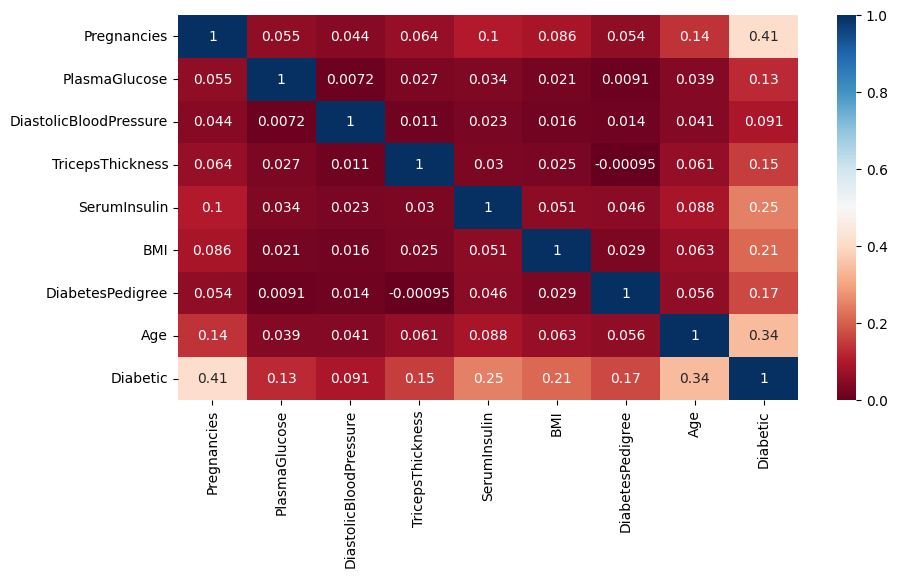

In [32]:
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="RdBu",annot=True)

### Inconsistencies detecting

In [33]:
import pandas as pd
import numpy as np

def find_dynamic_inconsistencies(data):
    inconsistent_conditions = []

    # IQR for outlier detection in each column
    for column in ['Age', 'Pregnancies', 'BMI', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin']:
        if column in data.columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            condition = (data[column] < lower_bound) | (data[column] > upper_bound)
            inconsistent_conditions.append(condition)
            print(f"{column}: Outliers identified as below {lower_bound:.2f} or above {upper_bound:.2f}")

    if 'Age' in data.columns and 'Pregnancies' in data.columns:
        condition = (data['Age'] < 15) & (data['Pregnancies'] > data['Pregnancies'].quantile(0.90))
        inconsistent_conditions.append(condition)
        print("Rule 1: Unusually high pregnancies detected for Age < 15.")

    if 'Age' in data.columns and 'Pregnancies' in data.columns:
        condition = (data['Age'] > 20) & (data['Pregnancies'] > 3)
        inconsistent_conditions.append(condition)
        print("Rule 2: Unusually high pregnancies detected for Age under 20.")

    if 'Age' in data.columns and 'BMI' in data.columns:
        condition = (data['Age'] < 10) & (data['BMI'] > 25)
        inconsistent_conditions.append(condition)
        print("Rule 3: Unusually high BMI detected for Age < 10.")

    if 'PlasmaGlucose' in data.columns and 'SerumInsulin' in data.columns:
        condition = (data['PlasmaGlucose'] > 200) & (data['SerumInsulin'] < 10)
        inconsistent_conditions.append(condition)
        print("Rule 4: PlasmaGlucose > 200 with low SerumInsulin detected.")

    if 'DiastolicBloodPressure' in data.columns:
        condition = (data['DiastolicBloodPressure'] < 40) | (data['DiastolicBloodPressure'] > 120)
        inconsistent_conditions.append(condition)
        print("Rule 5: DiastolicBloodPressure detected outside normal range (40-120).")


    if 'SerumInsulin' in data.columns:
        condition = (data['SerumInsulin'] < 1) | (data['SerumInsulin'] > 400)
        inconsistent_conditions.append(condition)
        print("Rule 6: SerumInsulin value detected outside realistic bounds (1-400).")

    # Combine all conditions
    combined_condition = inconsistent_conditions[0]
    for condition in inconsistent_conditions[1:]:
        combined_condition |= condition

    # Identify inconsistent rows
    inconsistent_rows = data[combined_condition]
    return inconsistent_rows

# Apply the dynamic detection
dynamic_inconsistent_rows = find_dynamic_inconsistencies(data)

print("\nDynamic inconsistencies identified:")
print(dynamic_inconsistent_rows)

# Remove inconsistent rows
data = data.drop(dynamic_inconsistent_rows.index)

print(f"\nNumber of inconsistent rows removed: {len(dynamic_inconsistent_rows)}")
print("\nCleaned dataset:")
print(data)


Age: Outliers identified as below 2.50 or above 54.50
Pregnancies: Outliers identified as below -9.00 or above 15.00
BMI: Outliers identified as below -5.74 or above 66.26
PlasmaGlucose: Outliers identified as below 16.50 or above 196.50
DiastolicBloodPressure: Outliers identified as below 17.50 or above 125.50
TricepsThickness: Outliers identified as below -24.00 or above 80.00
SerumInsulin: Outliers identified as below -195.00 or above 429.00
Rule 1: Unusually high pregnancies detected for Age < 15.
Rule 2: Unusually high pregnancies detected for Age under 20.
Rule 3: Unusually high BMI detected for Age < 10.
Rule 4: PlasmaGlucose > 200 with low SerumInsulin detected.
Rule 5: DiastolicBloodPressure detected outside normal range (40-120).
Rule 6: SerumInsulin value detected outside realistic bounds (1-400).

Dynamic inconsistencies identified:
           Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
PatientID                                                       
1147438      

In [34]:
df.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


# **Data Cleaning**

1. **Load and Inspect the Data**

In [16]:
# Check for basic info
data.info()

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 1354778 to 1386396
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             15000 non-null  int64  
 1   PlasmaGlucose           15000 non-null  int64  
 2   DiastolicBloodPressure  15000 non-null  int64  
 3   TricepsThickness        15000 non-null  int64  
 4   SerumInsulin            15000 non-null  int64  
 5   BMI                     15000 non-null  float64
 6   DiabetesPedigree        15000 non-null  float64
 7   Age                     15000 non-null  int64  
 8   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.1 MB

Missing Values:
 Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic      

2. **Detect Outliers**

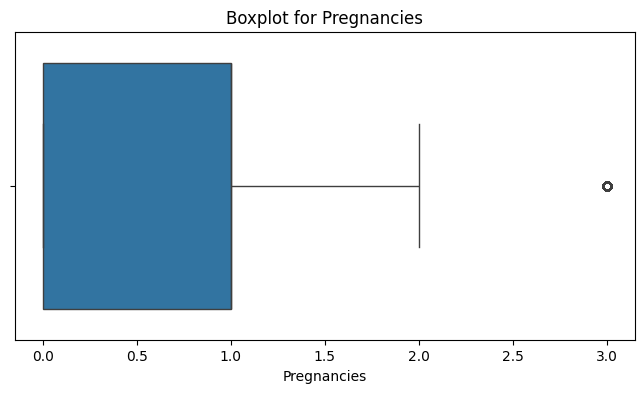

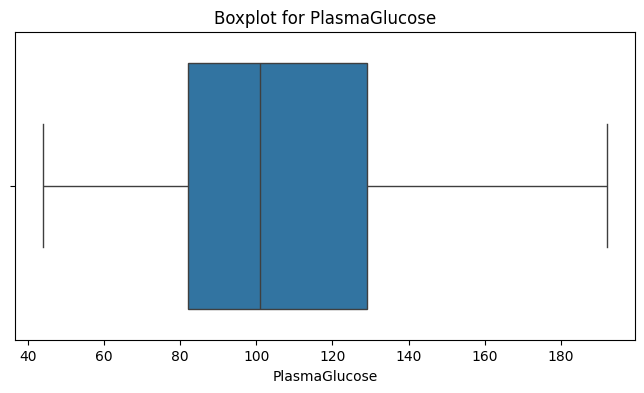

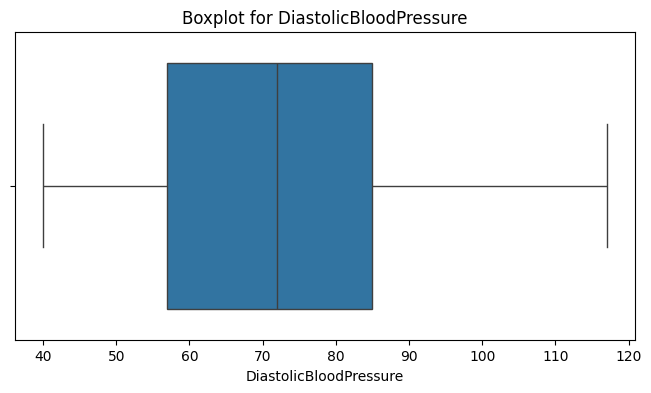

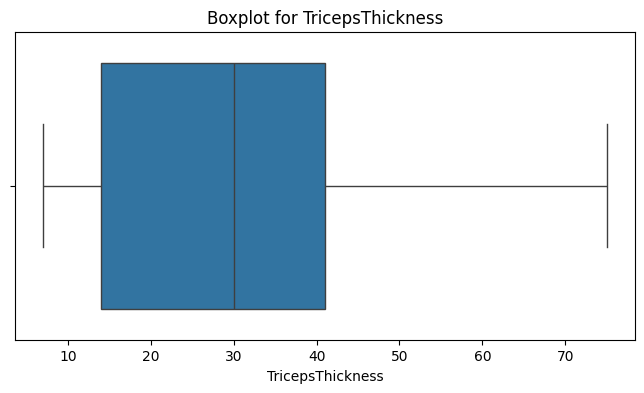

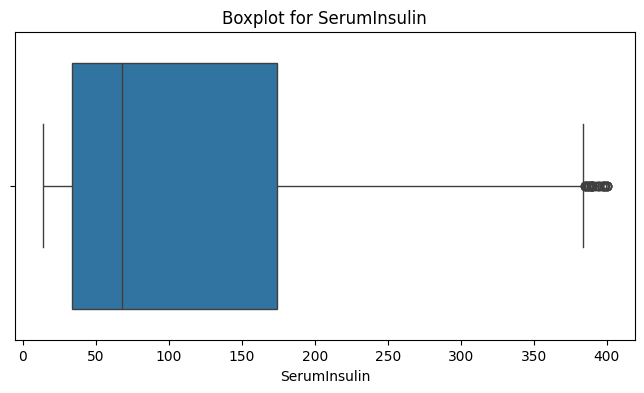

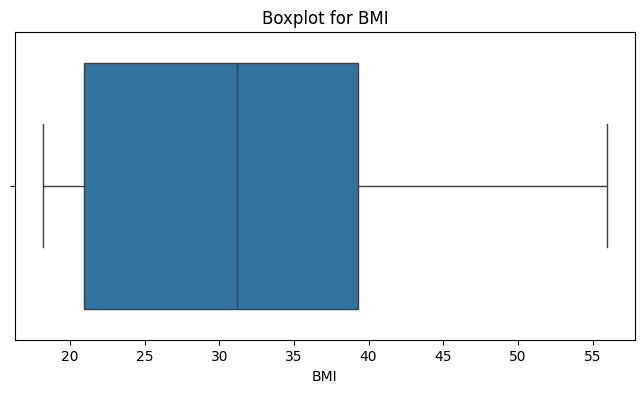

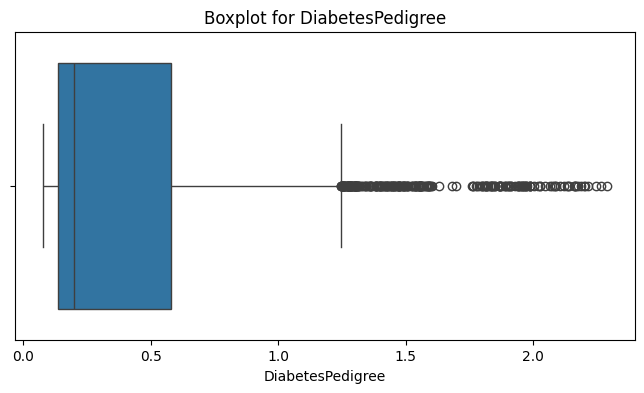

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for numerical columns
numeric_cols = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [42]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = data[numeric_cols].apply(zscore)

# Identify rows where z-score > 3 or < -3
outliers = (z_scores.abs() > 3).any(axis=1)

# Show rows with outliers
print("\nOutliers:\n", data[outliers])



Outliers:
            Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
PatientID                                                       
1140806              3            123                      61   
1107050              2            114                      66   
1135885              1            123                      78   
1571308              1            124                      84   
1919418              1            171                      49   
...                ...            ...                     ...   
1400054              0            143                      80   
1963638              0             55                      80   
1674196              2            115                      91   
1100363              1            138                      79   
1345247              0             92                      44   

           TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
PatientID                                                      

3. **Address Outliers**


**Capping outliers refers to limiting or "clipping" the values of outliers to a certain range, usually defined by the percentile values of the data. here instead of removing outliers completely, we cap them to a threshold value**

In [43]:
# Option 1: Remove outliers
data_cleaned = data[~outliers]

# Option 2: Cap outliers at 99th percentile
for col in numeric_cols:
    upper_limit = data[col].quantile(0.92)
    lower_limit = data[col].quantile(0.08)
    data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)


4. **Verify Data Cleaning**

In [45]:
# Check for missing values again
print("\nAfter Cleaning - Missing Values:\n", data.isnull().sum())

# Check for duplicates again
print(f"\nAfter Cleaning - Duplicate rows: {data.duplicated().sum()}")

# Check statistical summary again
print("\nAfter Cleaning - Statistical Summary:\n", data.describe())



After Cleaning - Missing Values:
 Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

After Cleaning - Duplicate rows: 0

After Cleaning - Statistical Summary:
        Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
count  8310.000000    8310.000000             8310.000000       8310.000000   
mean      0.849338     106.507942               71.096992         27.593141   
std       1.014005      28.994982               15.418243         13.262414   
min       0.000000      67.000000               48.000000          9.000000   
25%       0.000000      82.000000               57.000000         14.000000   
50%       1.000000     101.000000               72.000000         30.000000   
75%       1.000000     129.000000               85.000000         41.00

# **Feature Extraction**

In [50]:
df = data.copy()

### **Preforming SMOTE to balance both classes for our classying model**

In [51]:
# Check the class distribution
class_counts = df['Diabetic'].value_counts()
print(f"Original class distribution:\n{class_counts}\n")

Original class distribution:
Diabetic
0    6847
1    1463
Name: count, dtype: int64



In [53]:
X = df.drop(columns=['Diabetic'])
y = df['Diabetic']  # target

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target back into a balanced DataFrame
df = pd.DataFrame(X_resampled, columns=X.columns)
df['Diabetic'] = y_resampled

balanced_class_counts = pd.Series(y_resampled).value_counts()
print(f"Balanced class distribution after SMOTE:\n{balanced_class_counts}")

print("\nFirst few rows of the balanced dataset:")
print(df.head())


Balanced class distribution after SMOTE:
Diabetic
0    6847
1    6847
Name: count, dtype: int64

First few rows of the balanced dataset:
   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0            0            157                      80                34   
1            1             85                      59                27   
2            0             82                      92                 9   
3            0            133                      48                19   
4            0             67                      87                43   

   SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0          23.0  43.509726          0.929373   21         0  
1          35.0  42.604536          0.549542   22         0  
2         253.0  19.724160          0.103424   26         0  
3         227.0  21.941357          0.174160   21         0  
4          36.0  19.244073          0.236165   26         0  


C:\ProgramData\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\ProgramData\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [54]:
df

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,157,80,34,23.000000,43.509726,0.929373,21,0
1,1,85,59,27,35.000000,42.604536,0.549542,22,0
2,0,82,92,9,253.000000,19.724160,0.103424,26,0
3,0,133,48,19,227.000000,21.941357,0.174160,21,0
4,0,67,87,43,36.000000,19.244073,0.236165,26,0
...,...,...,...,...,...,...,...,...,...
13689,2,129,64,31,256.000000,29.900952,0.155146,22,1
13690,2,103,89,44,194.332417,33.718975,0.687881,46,1
13691,1,67,61,39,53.091020,31.649538,0.271237,43,1
13692,2,156,83,29,20.925646,21.081424,0.863374,46,1


### **Feature extraction**

In [55]:
import pandas as pd

# 1. BMI-to-Age Ratio
df['BMI_Age_Ratio'] = df['BMI'] / df['Age']

# 2. Insulin Sensitivity Index (ISI)
df['ISI'] = 10000 / (df['PlasmaGlucose'] * df['SerumInsulin'])

# 3. Blood Pressure Normalized by Age (BP-Age Ratio)
df['BP_Age_Ratio'] = df['DiastolicBloodPressure'] / df['Age']

# 4. High-Risk Pregnancy Index
df['HighRiskPregnancy'] = (df['Pregnancies'] * df['BMI']) / df['Age']

# 5. Glucose-Insulin Product
df['Glucose_Insulin'] = df['PlasmaGlucose'] * df['SerumInsulin']

# 6. Pregnancies-to-Age Ratio
df['Pregnancies_Age_Ratio'] = df['Pregnancies'] / df['Age']

# 7. Metabolic Risk Score
df['Metabolic_Risk'] = (df['BMI'] + df['PlasmaGlucose'] + df['DiastolicBloodPressure']) / 3

# 8. Pedigree-Adjusted Glucose
df['Pedigree_Glucose'] = df['PlasmaGlucose'] * df['DiabetesPedigree']

# 9. Fat Distribution Index
df['Fat_Index'] = (df['BMI'] + df['TricepsThickness']) / 2


In [57]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13694 entries, 0 to 13693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             13694 non-null  int64  
 1   PlasmaGlucose           13694 non-null  int64  
 2   DiastolicBloodPressure  13694 non-null  int64  
 3   TricepsThickness        13694 non-null  int64  
 4   SerumInsulin            13694 non-null  float64
 5   BMI                     13694 non-null  float64
 6   DiabetesPedigree        13694 non-null  float64
 7   Age                     13694 non-null  int64  
 8   Diabetic                13694 non-null  int64  
 9   BMI_Age_Ratio           13694 non-null  float64
 10  ISI                     13694 non-null  float64
 11  BP_Age_Ratio            13694 non-null  float64
 12  HighRiskPregnancy       13694 non-null  float64
 13  Glucose_Insulin         13694 non-null  float64
 14  Pregnancies_Age_Ratio   13694 non-null

In [58]:
data.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
PatientID,,,,,,,,,
1354778,0,157,80,34,23.0,43.509726,0.929373,21,0
1424119,1,85,59,27,35.0,42.604536,0.549542,22,0
1619297,0,82,92,9,253.0,19.724160,0.103424,26,0
1660149,0,133,48,19,227.0,21.941357,0.174160,21,0
1458769,0,67,87,43,36.0,19.244073,0.236165,26,0


In [59]:
df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,BMI_Age_Ratio,ISI,BP_Age_Ratio,HighRiskPregnancy,Glucose_Insulin,Pregnancies_Age_Ratio,Metabolic_Risk,Pedigree_Glucose,Fat_Index
0,0,157,80,34,23.0,43.509726,0.929373,21,0,2.071892,2.769316,3.809524,0.00000,3611.0,0.000000,93.503242,145.911545,38.754863
1,1,85,59,27,35.0,42.604536,0.549542,22,0,1.936570,3.361345,2.681818,1.93657,2975.0,0.045455,62.201512,46.711059,34.802268
2,0,82,92,9,253.0,19.724160,0.103424,26,0,0.758622,0.482021,3.538462,0.00000,20746.0,0.000000,64.574720,8.480809,14.362080
3,0,133,48,19,227.0,21.941357,0.174160,21,0,1.044827,0.331225,2.285714,0.00000,30191.0,0.000000,67.647119,23.163251,20.470678
4,0,67,87,43,36.0,19.244073,0.236165,26,0,0.740157,4.145937,3.346154,0.00000,2412.0,0.000000,57.748024,15.823051,31.122036


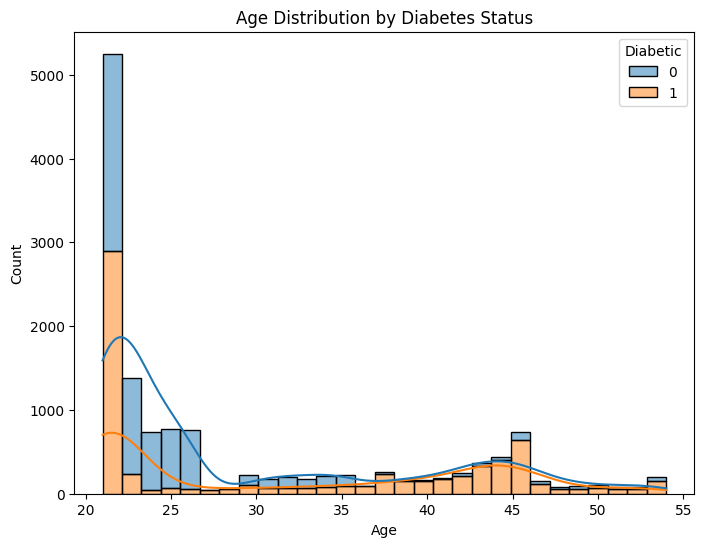

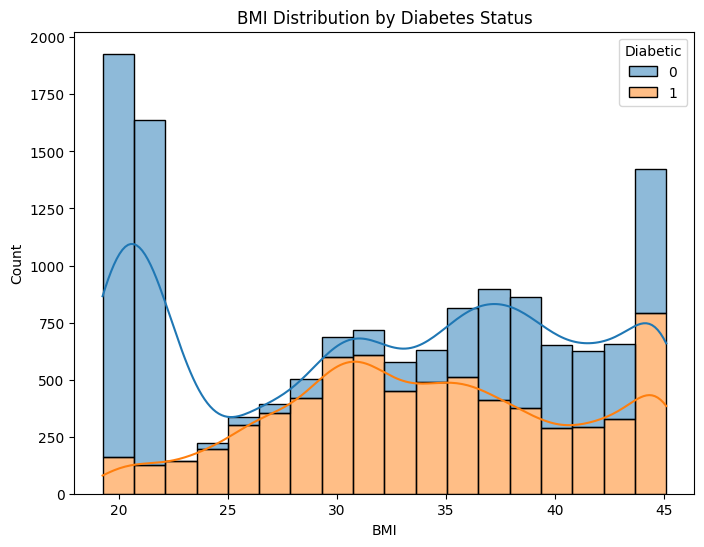

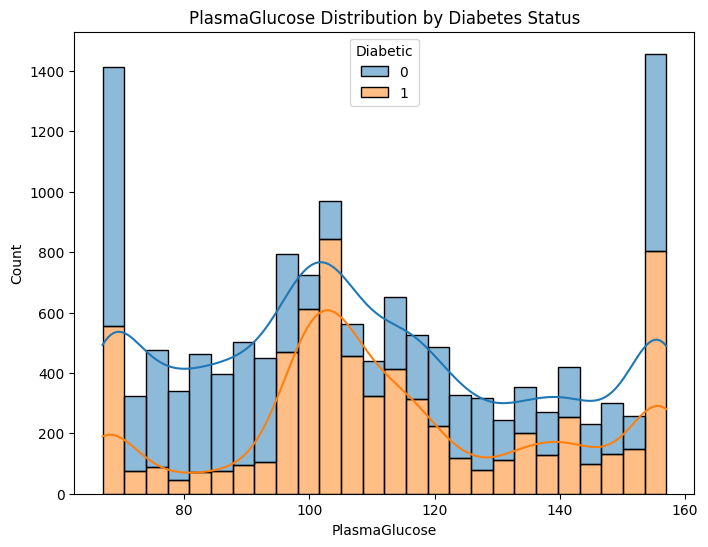

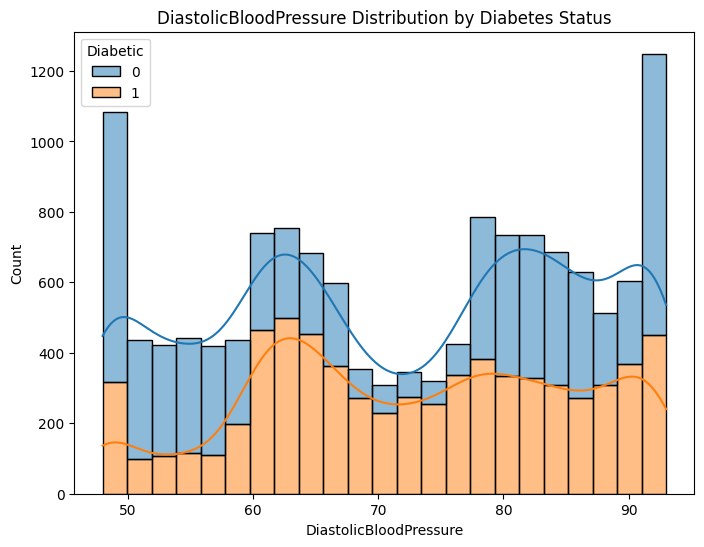

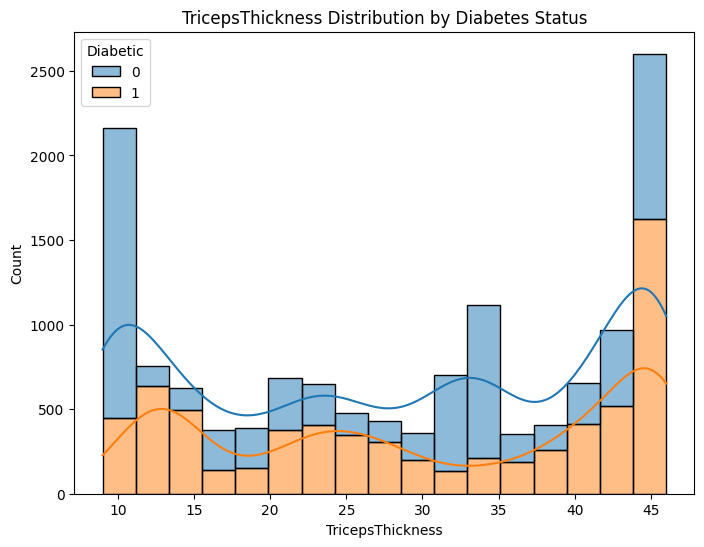

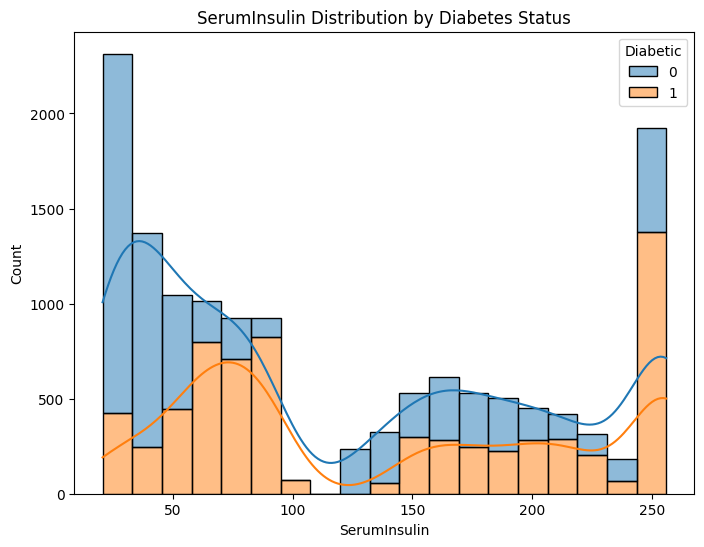

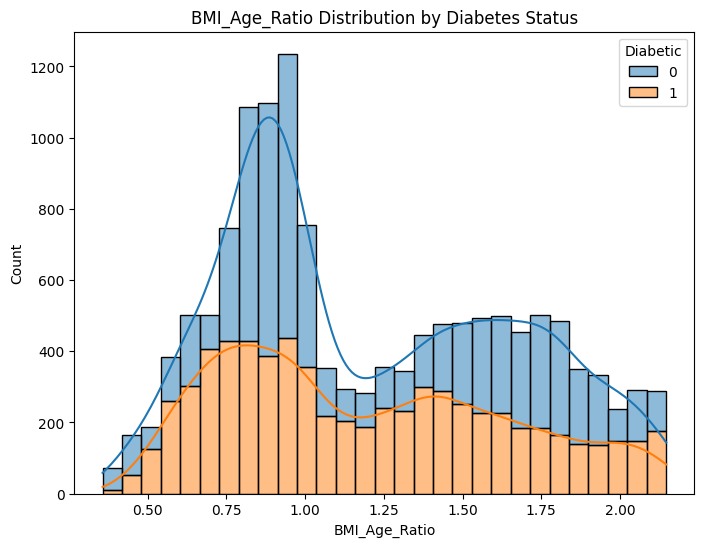

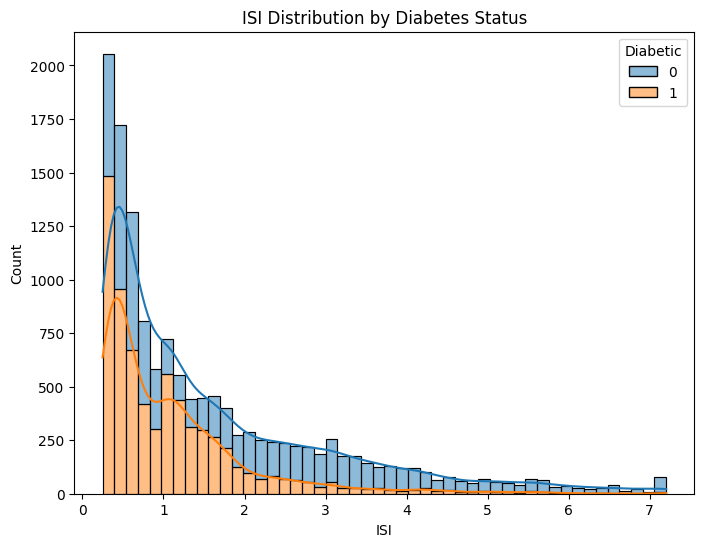

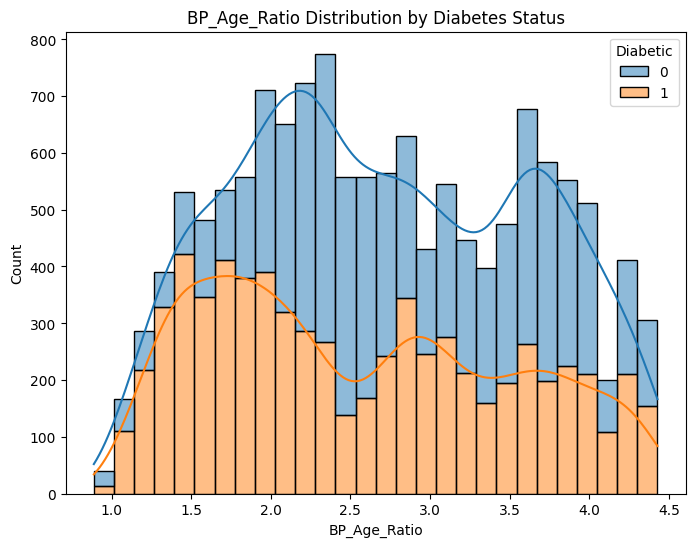

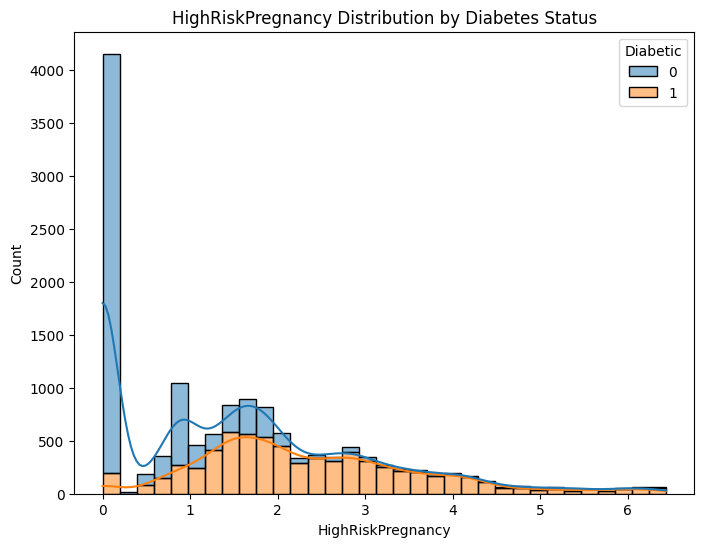

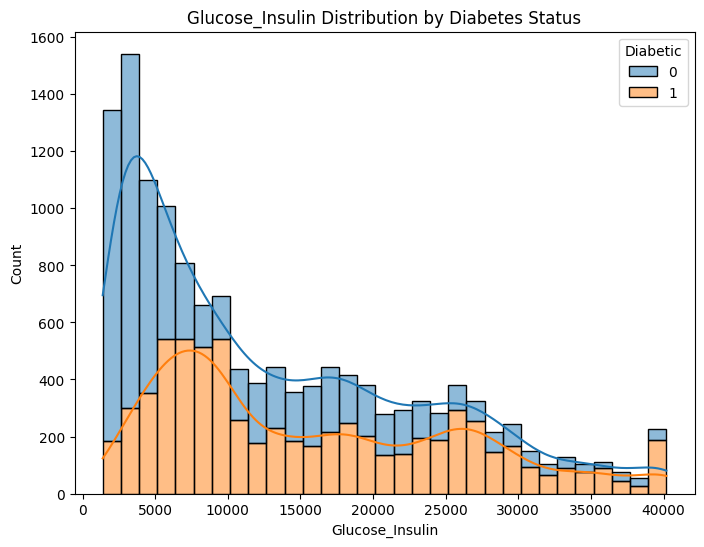

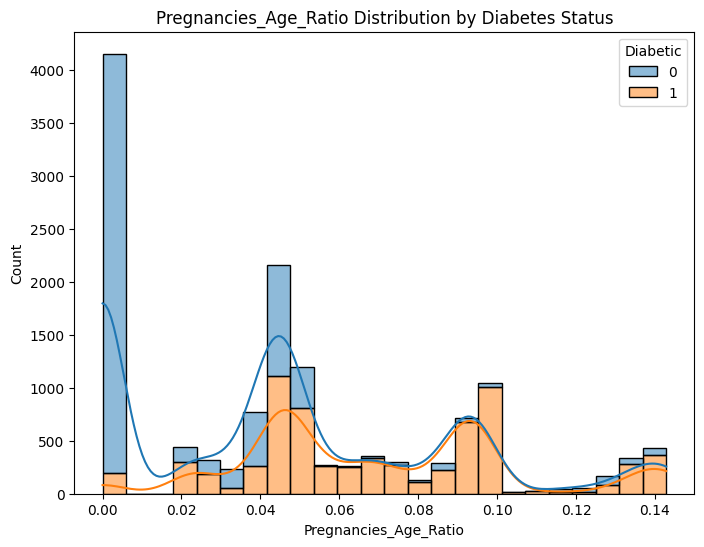

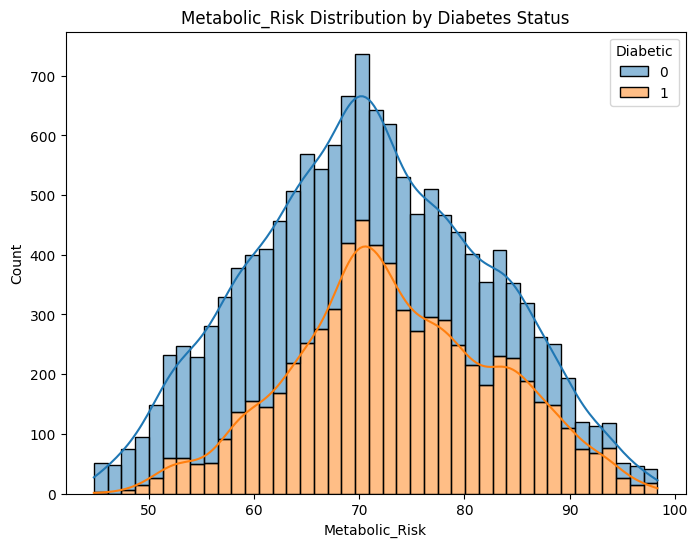

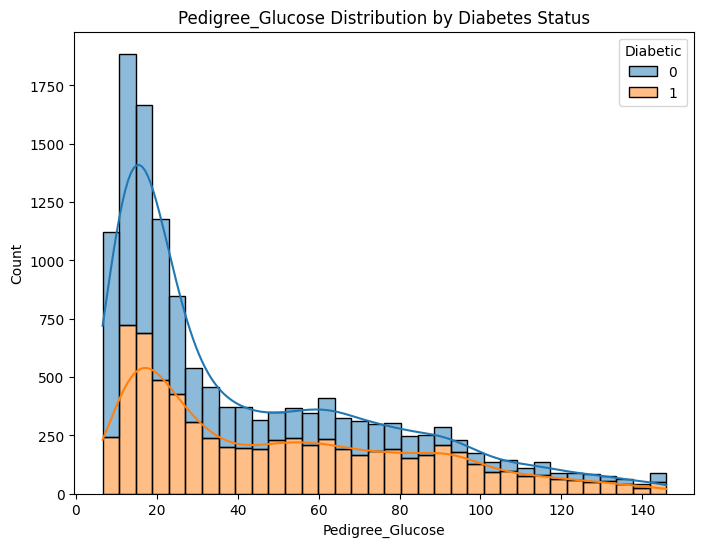

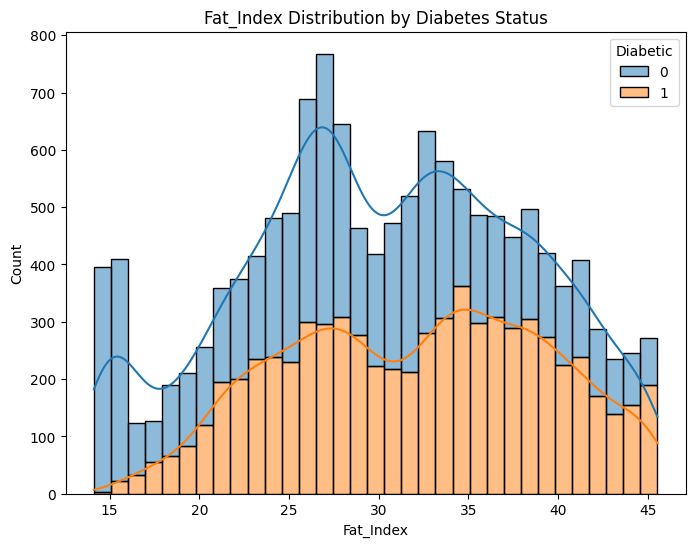

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous features
continuous_features = [
    'Age', 'BMI', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness',
    'SerumInsulin', 'BMI_Age_Ratio', 'ISI', 'BP_Age_Ratio', 'HighRiskPregnancy',
    'Glucose_Insulin', 'Pregnancies_Age_Ratio', 'Metabolic_Risk', 'Pedigree_Glucose', 'Fat_Index'
]

# Plot histograms for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Diabetic', kde=True, multiple='stack')
    plt.title(f'{feature} Distribution by Diabetes Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


## **Correlation Heatmap**


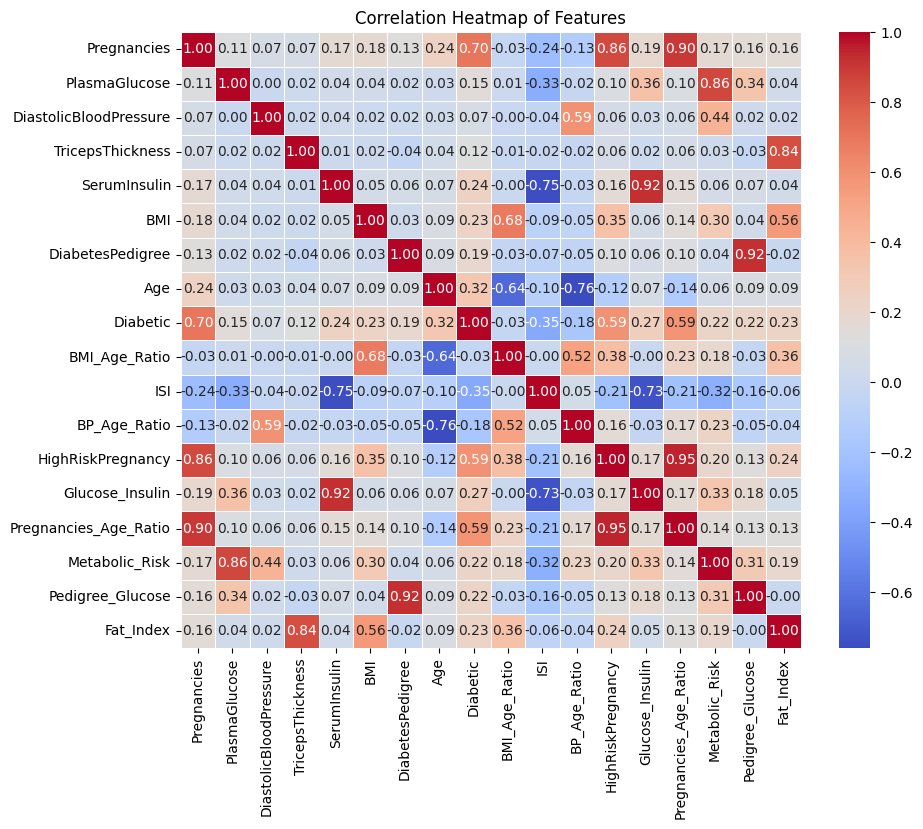

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


**Orginal data correlation matric after outliers handling**

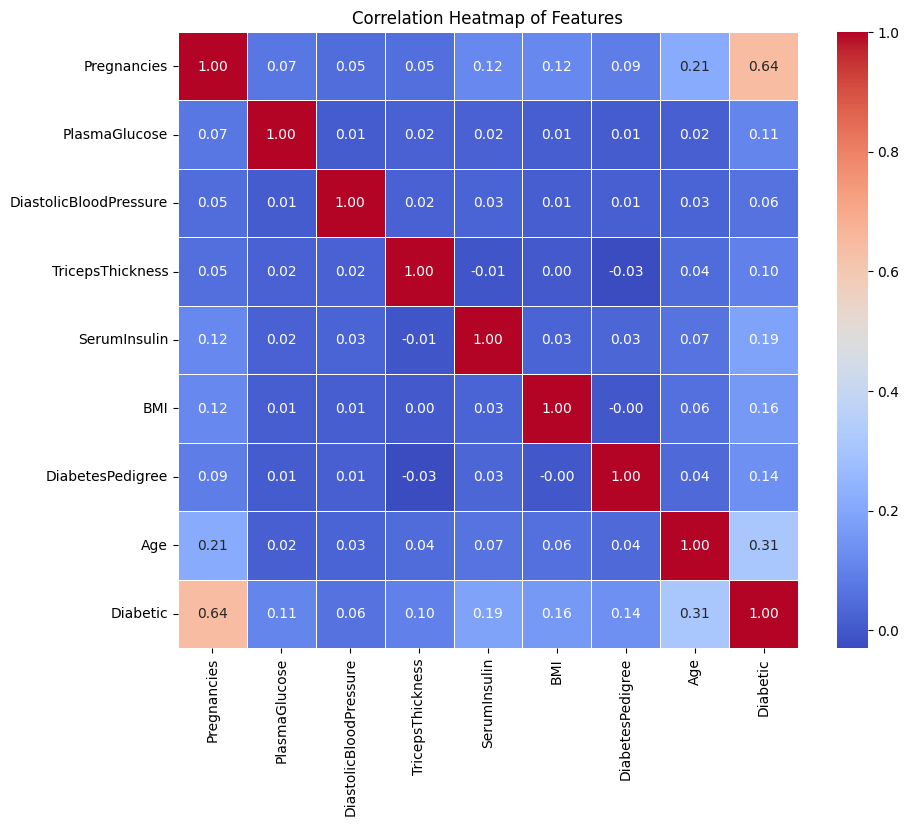

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()
